# Karate binary case

# Part 1 - optimal resolution (gamma) hyperparameter search

Experiment objectives
1. Perform preliminary screening to scan what Advantage generally produces:
    - how gamma resolution determines modularity scores,
    - find the optimal input gamma resolution range.
2. Perform the abovementioned on louvain.
3. Compare resolution range and modularity scores for both methods.

Glossary
- res. - resolution (abbr.)
- matrix resolution (gamma) - the input network hyperparameter determining the objective function of a given problem
- modularity resolution - modularity hyperparameter passed to the modularity score function
- modularity score (Q) - result of the modularity score function

Constants
- For the purposes of this experiment and the following ones, we arbitrarily set the modularity resolution to 1.0. As it is constant, modularity scores can be compared against each other.

# Advantage

#### Experiment scope:
- gamma in range [0.4, 1.5], 20 values
- for each value run 5 times

In [1]:
GAMMA_LOWER_BOUND = 0.4
GAMMA_UPPER_BOUND = 1.5

In [2]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


# Id for data storage purposes
ID = 2

a = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="adv")
)

In [3]:
K = 2

n_all = a.shape[0]

n_groups = a.groupby(a.matrix_res).ngroups
n_in_group = a.groupby(a.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 20 resolution param values, each value run 5 times.


#### Group results by matrix resolution (gamma) input

In [4]:
import numpy as np


# Only res. samples with 2 communities
print("All samples produced 2 communities: ", np.all(a == a[a["k"] == K]))

a_scores = a.mod_score
a_matrix_res = a.matrix_res

# Group by matrix resolution
# Measure mean and max values
# for each matrix res. input
a_by_res = a.groupby(a.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
a_by_res = a_by_res.round(score_prec)
a_by_res.index = a_by_res.index.to_series().round(idx_prec)

print(f"{a.shape[0]} results entries")
print(f"{a_by_res.shape[0]} resolution value params")

All samples produced 2 communities:  True
100 results entries
20 resolution value params


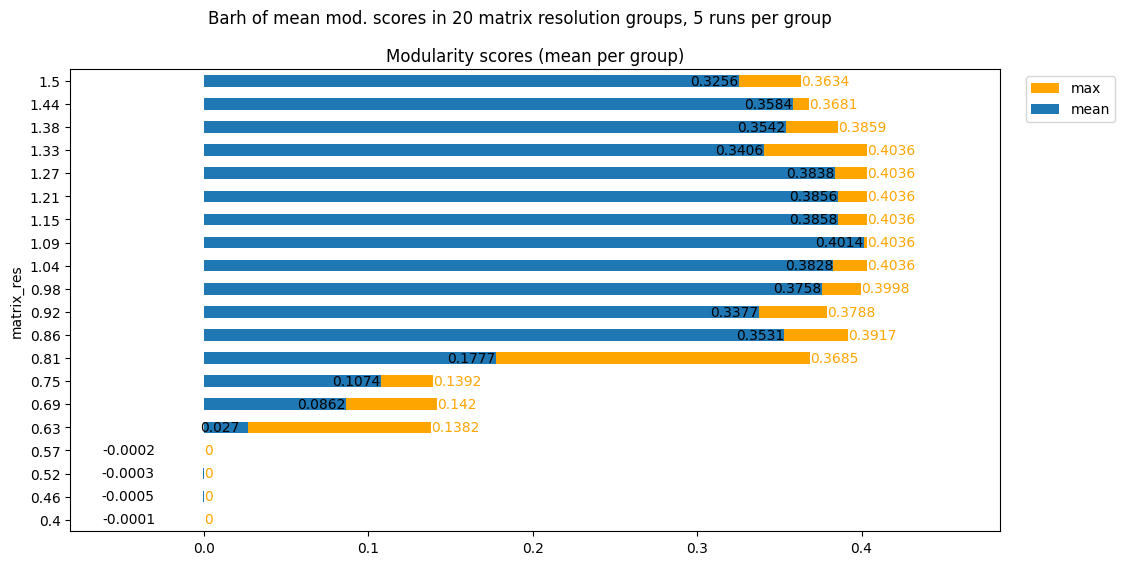

In [5]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

a_max_barh = a_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

a_mean_barh = a_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- Advantage produced sensible results for gamma values in range [1.04, 1.27], i.e. mean mod. score >= 0.38.
- For almost each gamma val. in range [1.04, 1.33] it produced at least once the best score of 0.4036.
- Best result of mean mod. score 0.4014 (and max 0.4036) achieved for gamma = 1.09.

In [6]:
a_by_res

mod_score                        
                mean     std     max     min
matrix_res                                  
0.40         -0.0001  0.0000  0.0000 -0.0001
0.46         -0.0005  0.0006  0.0000 -0.0016
0.52         -0.0003  0.0003  0.0000 -0.0008
0.57         -0.0002  0.0002  0.0000 -0.0005
0.63          0.0270  0.0621  0.1382 -0.0016
0.69          0.0862  0.0696  0.1420 -0.0001
0.75          0.1074  0.0473  0.1392  0.0268
0.81          0.1777  0.1070  0.3685  0.1159
0.86          0.3531  0.0319  0.3917  0.3164
0.92          0.3377  0.0292  0.3788  0.3054
0.98          0.3758  0.0241  0.3998  0.3437
1.04          0.3828  0.0300  0.4036  0.3321
1.09          0.4014  0.0021  0.4036  0.3998
1.15          0.3858  0.0224  0.4036  0.3477
1.21          0.3856  0.0237  0.4036  0.3521
1.27          0.3838  0.0230  0.4036  0.3477
1.33          0.3406  0.0411  0.4036  0.2931
1.38          0.3542  0.0272  0.3859  0.3248
1.44          0.3584  0.0102  0.3681  0.3477
1.50          0.3256  0.0317  0.3634  0.2761

index min: 0.4
index max: 1.5
mean mod. score min: -0.0005
mean mod. score max: 0.4014


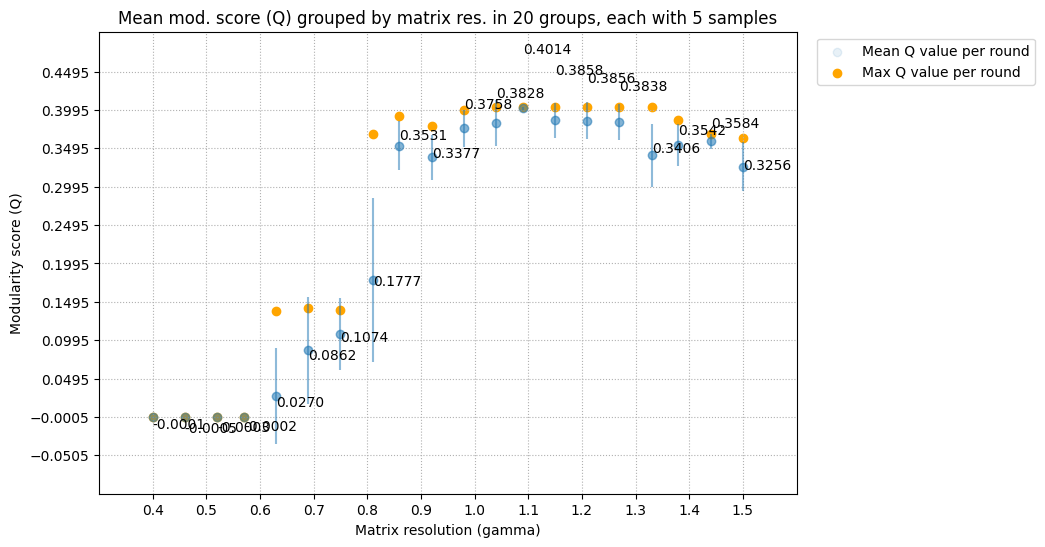

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


a_x_min = a_by_res.index.min()
a_x_max = a_by_res.index.max()
a_score_mean_min = a_by_res.mod_score["mean"].min()
a_score_mean_max = a_by_res.mod_score["mean"].max()

print(f"index min: {a_x_min}")
print(f"index max: {a_x_max}")
print(f"mean mod. score min: {a_score_mean_min}")
print(f"mean mod. score max: {a_score_mean_max}")


plt.rcParams["figure.figsize"] = (9, 6)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mean mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(a_x_min - x_margin, a_x_max + x_margin)
axes.set_xticks(
    np.arange(GAMMA_LOWER_BOUND, GAMMA_UPPER_BOUND + x_margin / 2, x_margin)
)
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))
]

d = {
    k: v for k, v in enumerate(zip(a_by_res.index, a_by_res.mod_score["mean"]))
}
d_sorted = dict(sorted(d.items(), key=lambda item: item[1][1]))
y_offsets = [0.1 if x > 0.41 else -0.03 for x in a_by_res.mod_score["mean"]]

off = 0.01
for i, t in enumerate(list(d_sorted.items())):
    _, (k, v) = t
    axes.annotate(
        text=f"{v:.4f}",
        xy=(k + x_offsets[i], v + y_offsets[i] + off),
        color="black",
    )
    # off += 0.005
    off *= 1.13

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

Zoom in

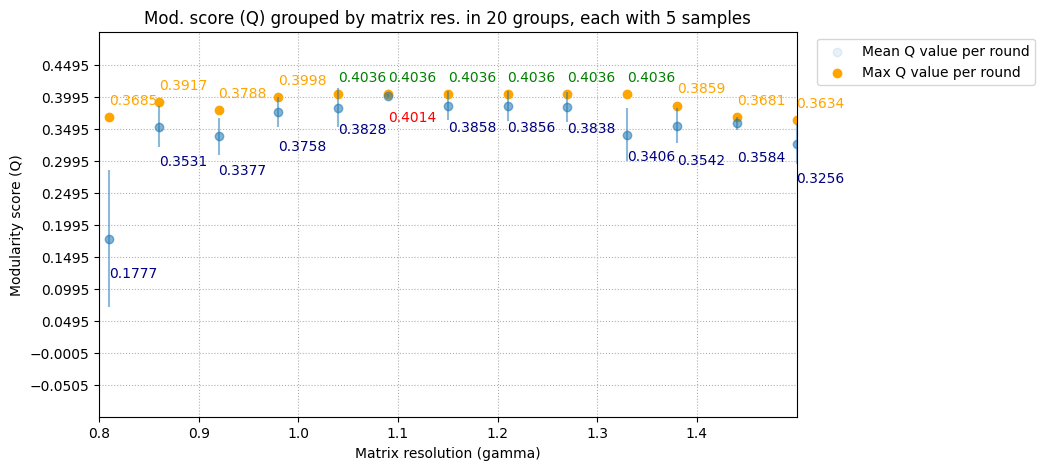

In [9]:
plt.rcParams["figure.figsize"] = (9, 5)

x_major_ticker = mpl.ticker.MultipleLocator(5)
x_minor_ticker = mpl.ticker.MultipleLocator(1)


fig, axes = plt.subplots()

axes.xaxis.set_major_locator(x_major_ticker)
axes.xaxis.set_minor_locator(x_minor_ticker)

axes.set_title(
    f"Mod. score (Q) grouped by matrix res. in {n_groups} groups,"
    + f" each with {n_in_group} samples"
)
axes.set_xlabel("Matrix resolution (gamma)")
axes.set_ylabel("Modularity score (Q)")

axes.grid(which="major", linestyle=":")

x_margin = 0.1
axes.set_xlim(0.8, 1.5)
axes.set_xticks(np.arange(0.8, 1.5, 0.1))
y_margin = 0.1
axes.set_ylim(a_score_mean_min - y_margin, a_score_mean_max + y_margin)
axes.set_yticks(
    np.arange(
        a_score_mean_min - y_margin / 2,
        a_score_mean_max + y_margin / 2,
        step=y_margin / 2,
    )
)

axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    label="Mean Q value per round",
    alpha=0.1,
)
axes.scatter(
    a_by_res.mod_score.index,
    a_by_res.mod_score["max"],
    c="orange",
    label="Max Q value per round",
)
axes.errorbar(
    a_by_res.mod_score.index,
    a_by_res.mod_score["mean"],
    yerr=a_by_res.mod_score["std"],
    fmt="o",
    alpha=0.5,
)

x_offsets = [
    0.0009 * (-1) ** (i + 1) if y > 0.425 else 0
    for i, (x, y) in enumerate(zip(a_by_res.index, a_by_res.mod_score["max"]))
]

max_q_mean = a_by_res.mod_score["mean"].max()
max_q_max = a_by_res.mod_score["max"].max()

y_offsets = [0.01 if x > 0.4 else -0.01 for x in a_by_res.mod_score["max"]]
for i, (k, v) in enumerate(a_by_res.mod_score["max"].items()):
    if v == max_q_max:
        color = "green"
    else:
        color = "orange"
    axes.annotate(
        text=f"{v:.4f}", xy=(k + x_offsets[i], v + 0.02), color=color
    )

for i, (k, v) in enumerate(a_by_res.mod_score["mean"].items()):
    if v == max_q_mean:
        color = "red"
    else:
        color = "navy"
    axes.annotate(
        text=f"{v:.4f}",
        xy=(k + x_offsets[i] * (-1) ** i, v + y_offsets[i] - 0.05),
        color=color,
    )

axes.legend(bbox_to_anchor=(1.02, 1), loc=2);

## Let's compare it against louvain with the same search parameters

### i.e. experiment scope:
- gamma in range [0.4, 1.5] -> 20 values
- for each value run 5 times

In [10]:
GAMMA_LOWER_BOUND = 0.4
GAMMA_UPPER_BOUND = 1.5

In [11]:
import pandas as pd
from paths import csv_path, KARATE_PR_NAME


ID = 0

l = pd.read_csv(
    csv_path(id=ID, problem_name=KARATE_PR_NAME, solver_name="louvain")
)

In [12]:
K = 2

n_all = l.shape[0]

n_groups = l.groupby(l.matrix_res).ngroups
n_in_group = l.groupby(l.matrix_res).matrix_res.value_counts().iloc[0]

print(
    f"Run for {n_groups} resolution param values, each value run {n_in_group} times."
)

Run for 20 resolution param values, each value run 5 times.


This wide matrix resolution range results in different communities number. Taking into account result samples with exactly 2 communities.

In [13]:
# Only res. samples with 2 communities
l = l[l["k"] == K]

scores = l.mod_score
matrix_res = l.matrix_res

l_by_res = l.groupby(l.matrix_res, group_keys=True).agg(
    {"mod_score": ["mean", "std", "max", "min"]}
)

# Decimals precision
score_prec = 4
idx_prec = 2
l_by_res = l_by_res.round(score_prec)
l_by_res.index = l_by_res.index.to_series().round(idx_prec)

print(f"{l.shape[0]} results entries for {K} communities")
print(
    f"{l_by_res.shape[0]} different resolution value params for {K} communities"
)

24 results entries for 2 communities
8 different resolution value params for 2 communities


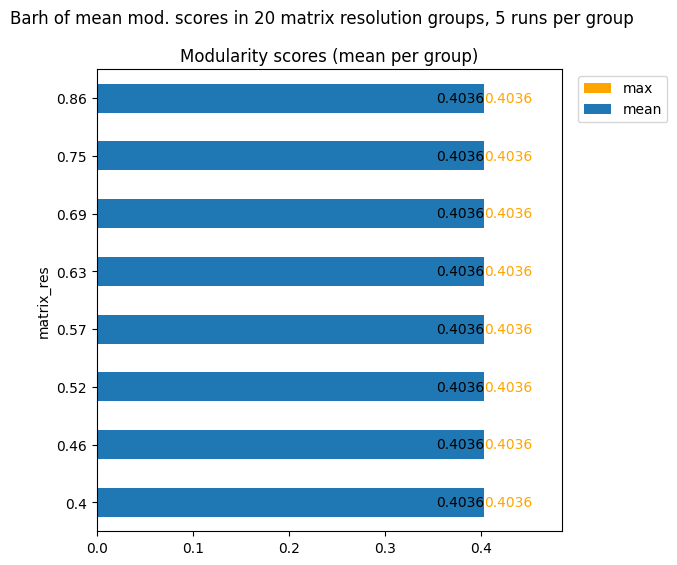

In [14]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(6, 6))
fig.suptitle(
    "Barh of mean mod. scores in "
    + f"{n_groups} matrix resolution groups, "
    + f"{n_in_group} runs per group"
)

l_max_barh = l_by_res.mod_score["max"].plot(ax=ax, kind="barh", color="orange")
ax.bar_label(ax.containers[-1], label_type="edge", color="orange")

l_mean_barh = l_by_res.mod_score["mean"].plot(ax=ax, kind="barh")
ax.bar_label(
    ax.containers[-1], label_type="edge", position=(-35, 0), color="black"
)

ax.margins(x=0.2)
ax.set_title("Modularity scores (mean per group)")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2);

- For all the entry gamma value groups in range [0.4, 0.86] mean scores were equal to max scores.
- The highest possible modularity score is 0.4036.

## Conclusions after part 1

1. For this particular *karate* problem, Advantage and louvain need different input hyperparameter resolution (gamma) values to produce *2* communities (the binary case):

- Advantage in range [1.09, 1.27] - this needs further frequential examination,
- louvain in range [0.4, 0.86].

2. Louvain - with as little as 5 runs per param it produces correct results.

3. We set out referential maximum modularity score for this problem to 0.4036 - best louvain result.
4. Most importantly for us, highest mod. score can be obtined by Advantage as well - with frequency examined in part 2.